In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [0]:
Tmin = pd.read_excel("./Used Datasets/tmin.xlsx")
Tmax = pd.read_excel("./Used Datasets/tmax.xlsx")
co2 = pd.read_csv("./Used Datasets/co2_trend_gl_re.txt", delim_whitespace=True)
NDVI = pd.read_excel("./Used Datasets/NDvI2011-2020.xlsx", infer_datetime_format=True)

In [0]:
Tavg = (np.array(Tmax.values[8 :, 1], dtype=float))/10
CO2 = co2.values[:, 3]

In [0]:
Tavg_new = np.zeros(Tavg.size*2, dtype=float)
for i in range(Tavg.size):
    Tavg_new[2*i] = Tavg[i]
    if 2*(i+1)<Tavg_new.size:
        Tavg_new[2*i+1] = (Tavg[i]+Tavg[i+1])/2
Tavg_new[-1] = (Tavg_new[-24]+Tavg_new[-48])/2

In [0]:
CO2 = co2.values[:,3]
co2_day=co2.values[:,2]
co2_month=co2.values[:,1]

CO2_avg = np.zeros(240-26, dtype=float)
sum=0
y=0
for c in range(CO2.size):
    if(co2_day[c]%31!=0):
        if(co2_month[c]!=2):
            sum+=CO2[c]
            if(co2_day[c]%15==0 and c!=0 ):
                CO2_avg[y]=sum/15
                sum=0
                y=y+1
        elif(co2_day[c]%29!=0):
            sum+=CO2[c]
            if(co2_day[c]%14==0  ):
                CO2_avg[y]=sum/14
                sum=0
                y=y+1
# CO2_avg[0]=391
CO2_avg = CO2_avg[: -8]

In [0]:
df_pr_co2 = NDVI.copy()
df_pr_co2 = df_pr_co2.drop(index=df_pr_co2.index[-10 :], columns='NDVI')
df_pr_co2['CO2'] = CO2_avg
df_pr_co2.DateTime = pd.to_datetime(df_pr_co2.DateTime, yearfirst=True)
df_pr_co2 = df_pr_co2.set_index("DateTime")
df_pr_co2 = df_pr_co2.reset_index()
df_pr_co2.columns = ['ds','y']

In [109]:
#Validate our model using 2019 as reerence
train_data_pr_co2 = df_pr_co2.iloc[:len(df_pr_co2)-24]
test_data_pr_co2 = df_pr_co2.iloc[len(df_pr_co2)-24:]
m_co2 = Prophet(yearly_seasonality=True, weekly_seasonality=True)
m_co2.fit(train_data_pr_co2)
future_co2 = m_co2.make_future_dataframe(periods=24,freq="SMS")
prophet_pred_co2 = m_co2.predict(future_co2)
prophet_pred_co2 = pd.DataFrame({"Date" : prophet_pred_co2[-24:]['ds'], "Pred" : prophet_pred_co2[-24:]["yhat"]})
prophet_pred_co2 = prophet_pred_co2.set_index("Date")
prophet_pred_co2.index.freq = "SMS"

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


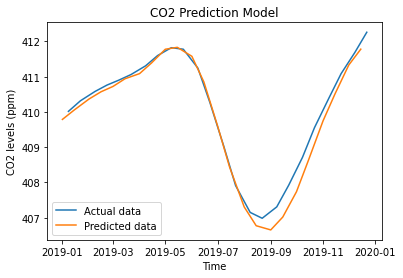

In [110]:
f_co2 = plt.figure(1)
ax_co2 = f_co2.add_subplot(111)
ax_co2.plot(test_data_pr_co2['ds'], test_data_pr_co2['y'].values, label="Actual data")
ax_co2.plot(prophet_pred_co2.index, prophet_pred_co2['Pred'].values, label="Predicted data")
ax_co2.legend()
ax_co2.set_ylabel('CO2 levels (ppm)')
ax_co2.set_xlabel('Time')
ax_co2.set_title('CO2 Prediction Model')

f_co2.show()
f_co2.savefig('Co2_Model.png', dpi=300)

In [111]:
#Predict data for 2020 & 2021
train_data_pr1_co2 = df_pr_co2.iloc[:len(df_pr_co2)]
m1_co2 = Prophet(yearly_seasonality=True, weekly_seasonality=True)
m1_co2.fit(train_data_pr1_co2)
future1_co2 = m1_co2.make_future_dataframe(periods=48,freq="SMS")
prophet_pred1_co2 = m1_co2.predict(future1_co2)
prophet_pred1_co2 = pd.DataFrame({"Date" : prophet_pred1_co2[-48:]['ds'], "Pred" : prophet_pred1_co2[-48:]["yhat"]})
prophet_pred1_co2 = prophet_pred1_co2.set_index("Date")
prophet_pred1_co2.index.freq = "SMS"

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


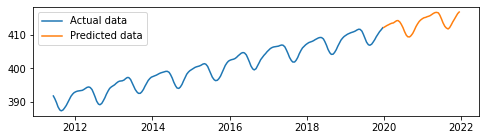

In [112]:
f1_co2 = plt.figure(figsize=(8, 2))
ax1_co2 = f1_co2.add_subplot(111)
ax1_co2.plot(train_data_pr1_co2['ds'].values, train_data_pr1_co2['y'].values, label="Actual data")
ax1_co2.plot(prophet_pred1_co2.index, prophet_pred1_co2['Pred'].values, label="Predicted data")
ax1_co2.legend()

f1_co2.show()

In [0]:
df_pr_T = NDVI.copy()
df_pr_T = df_pr_T.drop(index=df_pr_T.index[-10 :], columns='NDVI')
df_pr_T['Temp'] = Tavg_new
df_pr_T.DateTime = pd.to_datetime(df_pr_T.DateTime, yearfirst=True)
df_pr_T = df_pr_T.set_index("DateTime")
df_pr_T = df_pr_T.reset_index()
df_pr_T.columns = ['ds','y']

In [114]:
#Validate our model using 2019 as reerence
train_data_pr_T = df_pr_T.iloc[:len(df_pr_T)-24]
test_data_pr_T = df_pr_T.iloc[len(df_pr_T)-24:]
m_T = Prophet(yearly_seasonality=True, weekly_seasonality=True)
m_T.fit(train_data_pr_T)
future_T = m_T.make_future_dataframe(periods=24,freq="SMS")
prophet_pred_T = m_T.predict(future_T)
prophet_pred_T = pd.DataFrame({"Date" : prophet_pred_T[-24:]['ds'], "Pred" : prophet_pred_T[-24:]["yhat"]})
prophet_pred_T = prophet_pred_T.set_index("Date")
prophet_pred_T.index.freq = "SMS"

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


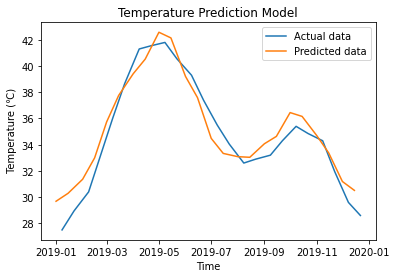

In [115]:
f_T = plt.figure(1)
ax_T = f_T.add_subplot(111)
ax_T.plot(test_data_pr_T['ds'], test_data_pr_T['y'].values, label="Actual data")
ax_T.plot(prophet_pred_T.index, prophet_pred_T['Pred'].values, label="Predicted data")
ax_T.legend()
ax_T.set_ylabel(' Temperature (℃)')
ax_T.set_xlabel('Time')
ax_T.set_title('Temperature Prediction Model')


f_T.show()
f_T.savefig('Temp_Model.png', dpi=300)

In [116]:
#Predict data for 2020 & 2021
train_data_pr1_T = df_pr_T.iloc[:len(df_pr_T)]
m1_T = Prophet(yearly_seasonality=True, weekly_seasonality=True)
m1_T.fit(train_data_pr1_T)
future1_T = m1_T.make_future_dataframe(periods=48,freq="SMS")
prophet_pred1_T = m1_T.predict(future1_T)
prophet_pred1_T = pd.DataFrame({"Date" : prophet_pred1_T[-48:]['ds'], "Pred" : prophet_pred1_T[-48:]["yhat"]})
prophet_pred1_T = prophet_pred1_T.set_index("Date")
prophet_pred1_T.index.freq = "SMS"

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


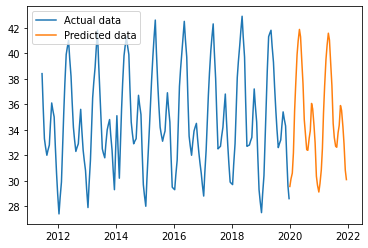

In [117]:
f1_T = plt.figure(1)
ax1_T = f1_T.add_subplot(111)
ax1_T.plot(train_data_pr1_T['ds'].values, train_data_pr1_T['y'].values, label="Actual data")
ax1_T.plot(prophet_pred1_T.index, prophet_pred1_T['Pred'].values, label="Predicted data")
ax1_T.legend()

f1_T.show()

In [0]:
Tyear=np.zeros(9)
Tavg1 = (np.array(np.array(Tmax.values[3 :, 1], dtype=float)))/10
#Tmax1 = Tmax.values[8 :, 1]
for i in range(9):
    Tyear[i] = np.sum(Tavg1[i*12: i*12+12])/12
#Tyear[0] = np.sum(Tavg_new[: 10])/10

Tyear_pr = np.zeros(3)
Tyear_pr[1] = np.sum(prophet_pred1_T['Pred'].values[: 24])/24
Tyear_pr[2] = np.sum(prophet_pred1_T['Pred'].values[24 :])/24
Tyear_pr[0]=Tyear[-1]

In [0]:
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Tyear_data = pd.DataFrame()
Tyear_data['years'] = years[: -2]
Tyear_data['Temp'] = Tyear

Tyear_pred = pd.DataFrame()
Tyear_pred['years'] = years[-3 :]
Tyear_pred['Temp'] = Tyear_pr

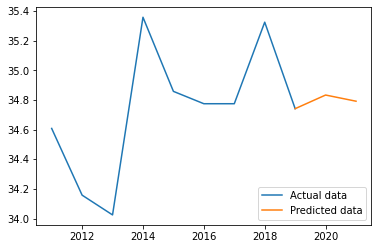

In [120]:
f_Tyear = plt.figure(4)
ax_Tyear = f_Tyear.add_subplot(111)
ax_Tyear.plot(Tyear_data['years'].values, Tyear_data['Temp'].values, label="Actual data")
ax_Tyear.plot(Tyear_pred['years'].values, Tyear_pred['Temp'].values, label="Predicted data")
ax_Tyear.legend()

f_Tyear.show()

In [121]:
Tyear_pr

array([34.74166667, 34.83365348, 34.79197205])